In [1]:
# Decision Tree
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
dataset = pd.read_csv('/content/ConsideredMeanSTDP2Authors.csv')

# Features & target variables
X = dataset.iloc[:, 1:19].values
y = dataset.iloc[:, 20].values

# Hyperparameters
dt_parameters = {'max_depth': range(1, 5), 'criterion': ['gini', 'entropy']}

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Strategy
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize
dt_accuracy_scores_test = []
dt_precision_scores_test = []
dt_recall_scores_test = []
dt_f1_scores_test = []

# Initialize lists for confusion matrix
all_predictions = []
all_true_labels = []

# Storing the best model
best_dt_model_test = None
best_dt_score_test = 0.0

# Cross-validation
for train_index, test_index in outer_cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Decision Tree
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_grid_search = GridSearchCV(dt_classifier, dt_parameters, cv=inner_cv)
    dt_grid_search.fit(X_train_fold, y_train_fold)
    dt_best_params = dt_grid_search.best_params_
    dt_best_model = DecisionTreeClassifier(random_state=42, **dt_best_params)

    # Fit the best model
    dt_best_model.fit(X_train_fold, y_train_fold)

    # Evaluation
    dt_predictions_test = dt_best_model.predict(X_test_fold)

    # Append metrics
    dt_accuracy_scores_test.append(accuracy_score(y_test_fold, dt_predictions_test))
    dt_precision_scores_test.append(precision_score(y_test_fold, dt_predictions_test))
    dt_recall_scores_test.append(recall_score(y_test_fold, dt_predictions_test))
    dt_f1_scores_test.append(f1_score(y_test_fold, dt_predictions_test))

    # Store the model
    current_score = accuracy_score(y_test_fold, dt_predictions_test)
    if current_score > best_dt_score_test:
        best_dt_score_test = current_score
        best_dt_model_test = dt_best_model

    # Accumulate predictions and true labels
    all_predictions.extend(dt_predictions_test)
    all_true_labels.extend(y_test_fold)

# Save the best model
if best_dt_model_test is not None:
    joblib.dump(best_dt_model_test, 'best_decision_tree_model_test.pkl')

# Calculate
dt_average_accuracy_test = np.mean(dt_accuracy_scores_test)
dt_average_precision_test = np.mean(dt_precision_scores_test)
dt_average_recall_test = np.mean(dt_recall_scores_test)
dt_average_f1_test = np.mean(dt_f1_scores_test)

# Print
print("\nDecision Tree (Test Set):")
print("Accuracy:", round(dt_average_accuracy_test, 4))
print("Precision:", round(dt_average_precision_test, 4))
print("Recall:", round(dt_average_recall_test, 4))
print("F1-score:", round(dt_average_f1_test, 4))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Decision Tree (Test Set):
Accuracy: 0.9469
Precision: 0.9453
Recall: 0.95
F1-score: 0.947



Overall Confusion Matrix:
[[151   9]
 [  8 152]]


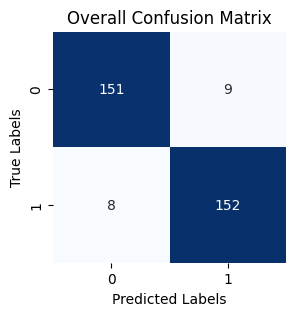

In [2]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)

# Show
print("\nOverall Confusion Matrix:")
print(conf_matrix)

# Plot
overall_confusion_matrix = confusion_matrix(all_true_labels, all_predictions)
plt.figure(figsize=(3, 3))
sns.heatmap(overall_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Overall Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()